# ARBOL DE DECISION
## Conjunto de datos de abulón
### INTRODUCCIÓN
Los abulones son moluscos de gran tradición y antigüedad, muy conocidos por su carne, pertenecen al género Haliotis. Se caracterizan por tener una concha en forma de oreja con una cara interna iridiscente y aperlada

### CLASIFICACIÓN 
El "abulón amarillo" tiene la concha circular, de 16 a 17 centímetros de largo
El "abulón azul" presenta concha ovalada de 18 centímetros de longitud
El "abulón chino" su concha es delgada y ovalada de 13 a 16 centímetros
El abulón que presenta la concha más grande en el estado adulto es el "abulón rojo" (Haliotis rufescens)
### Sobre las columnas 
Se proporciona el nombre de las columnas, el tipo de atributo, la unidad de medida y una breve descripción. El número de anillos es el valor a predecir: ya sea como valor continuo o como problema de clasificación.


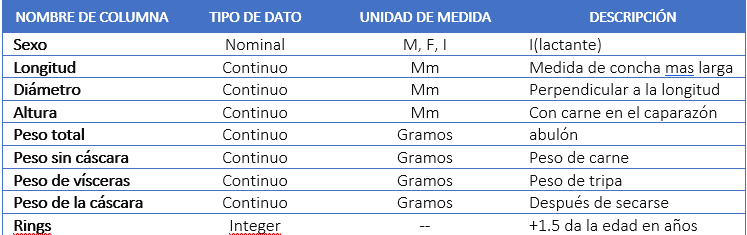

Las variables independientes(X) estaran compuestas por las columnas:

•	'Length (mm)'
•	'Diameter (mm)'
•	'Height (mm)'
•	'Whole (grams)'
•	'Shucked (grams)'
•	'Viscera (grams)'
•	'Shell (grams)'
•	'Rings (years)'


La variable dependiente(Y) estara compuesta por la columna ('Sex')
esto para lograr clasificar con los modelos de aprendizaje supervisado, el genero de los correspondientes datos.

In [65]:
import pandas as pd
dataset = pd.read_csv("abalone.csv", header=0)
X=dataset[['Length','Diameter','Height','Whole','Shucked','Viscera','Shell','Rings']]
y=dataset['Sex']

##### cargamos el dataset

In [66]:
import numpy as np

from sklearn.impute import SimpleImputer
imputacion = SimpleImputer(missing_values=np.nan, strategy="mean")
X=imputacion.fit_transform(X)

print('\n',X)
print('\n',y)

matriz_imputer = imputacion.fit_transform(X)
from sklearn import preprocessing
matriz_normal = preprocessing.normalize(matriz_imputer)



 [[ 0.455   0.365   0.095  ...  0.101   0.15   15.    ]
 [ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135  ...  0.1415  0.21    9.    ]
 ...
 [ 0.6     0.475   0.205  ...  0.2875  0.308   9.    ]
 [ 0.625   0.485   0.15   ...  0.261   0.296  10.    ]
 [ 0.71    0.555   0.195  ...  0.3765  0.495  12.    ]]

 0       1
1       1
2       2
3       1
4       3
       ..
4172    2
4173    1
4174    1
4175    2
4176    1
Name: Sex, Length: 4177, dtype: int64


#### realizamos una imputacion de los datos para no tener datos perdidos

In [67]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

##### importamos las librerias necesarias para el metodo y para su grafica

In [73]:
X_trn=[]
X_tst=[]
y_trn=[]
y_tst=[]
aux=[]
ind=0
fila=[]
lista2=[]
auxs=[]
TABLASC=[]
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
iter_for_prediction = cv.split(X, y)


In [75]:
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)
    randomf = RandomForestClassifier(random_state=0)
    gnb = GaussianNB()
    sk_clasificador = {'GaussianNB':gnb,'RandomForest':randomf}
        
    for i in range(3341):
        ind=train_index[i]
        X_trn.append(X[ind])
    for j in range(836):
        ind=test_index[j]
        X_tst.append(X[ind])
    for j in range(3341):
        ind=train_index[j]
        y_trn.append(y[ind])
    for j in range(836):
        ind=train_index[j]
        y_tst.append(y[ind])
      
    imputacion = SimpleImputer(missing_values=np.nan, strategy="mean")
    T=imputacion.fit_transform(X_trn)
    matriz_imputer = imputacion.fit_transform(T)
    matriz_normal = preprocessing.normalize(matriz_imputer)
     
    clasificador = tree.DecisionTreeClassifier(max_depth=3)
    clasificador.fit(T, y_trn)
    clasificador = clasificador.fit(X_trn, y_trn)
    print(clasificador.score(X_tst, y_tst))
    print(clasificador.score(X_trn, y_trn))
    print('CLASIFICADOR TREE: ',clasificador.predict([[0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10],[0.635,0.51,0.17,1.2235,0.532,0.271,0.354,9]]))
    aux.append(clasificador.score(X_tst, y_tst))
    aux.append(clasificador.score(X_trn, y_trn))
    TABLASC.append(aux)
    aux=[]
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        score = cross_val_score(estimador, X, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador,'Score: ', score)
        auxs.append(score)

0
0.3349282296650718
0.545645016462137
CLASIFICADOR TREE:  [2 1]
GaussianNB() Score:  [0.52751196]
RandomForestClassifier(random_state=0) Score:  [0.57177033]
1
0.34688995215311
0.5474408859622868
CLASIFICADOR TREE:  [2 1]
GaussianNB() Score:  [0.52990431]
RandomForestClassifier(random_state=0) Score:  [0.54904306]
2
0.3508771929824561
0.5480395091290033
CLASIFICADOR TREE:  [2 1]
GaussianNB() Score:  [0.52033493]
RandomForestClassifier(random_state=0) Score:  [0.5562201]
3
0.3480861244019139
0.5479646812331638
CLASIFICADOR TREE:  [2 1]
GaussianNB() Score:  [0.49162679]
RandomForestClassifier(random_state=0) Score:  [0.53947368]
4
0.3220095693779904
0.5490571685124215
CLASIFICADOR TREE:  [2 2]
GaussianNB() Score:  [0.52392344]
RandomForestClassifier(random_state=0) Score:  [0.56220096]
5
0.32097288676236047
0.5510326249625861
CLASIFICADOR TREE:  [2 2]
GaussianNB() Score:  [0.48086124]
RandomForestClassifier(random_state=0) Score:  [0.52751196]
6
0.32040328092959675
0.5512891777483218
CL

 *realizamos una division de 10 grupos con valores de entrenamiento y test diferentes, con los que se procede a clasificar   parametros, como tambien obtener el puntaje de cada seleccion de datos* 
 
 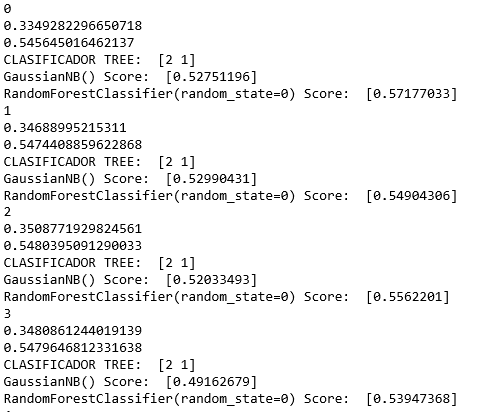

In [76]:
print(auxs)
print(TABLASC)

[array([0.52751196]), array([0.57177033]), array([0.52990431]), array([0.54904306]), array([0.52033493]), array([0.5562201]), array([0.49162679]), array([0.53947368]), array([0.52392344]), array([0.56220096]), array([0.48086124]), array([0.52751196]), array([0.50598086]), array([0.53349282]), array([0.48923445]), array([0.52870813]), array([0.53947368]), array([0.51674641]), array([0.51794258]), array([0.53708134])]
[[0.3349282296650718, 0.3349282296650718], [0.34688995215311, 0.34688995215311], [0.3508771929824561, 0.3508771929824561], [0.3480861244019139, 0.3480861244019139], [0.3220095693779904, 0.3220095693779904], [0.32097288676236047, 0.32097288676236047], [0.32040328092959675, 0.32040328092959675], [0.326255980861244, 0.326255980861244], [0.3270866560340245, 0.3270866560340245], [0.3229665071770335, 0.3229665071770335]]


se obtiene una tabla con las puntuaciones de las muestras
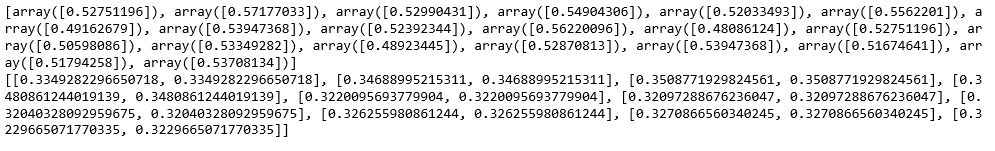

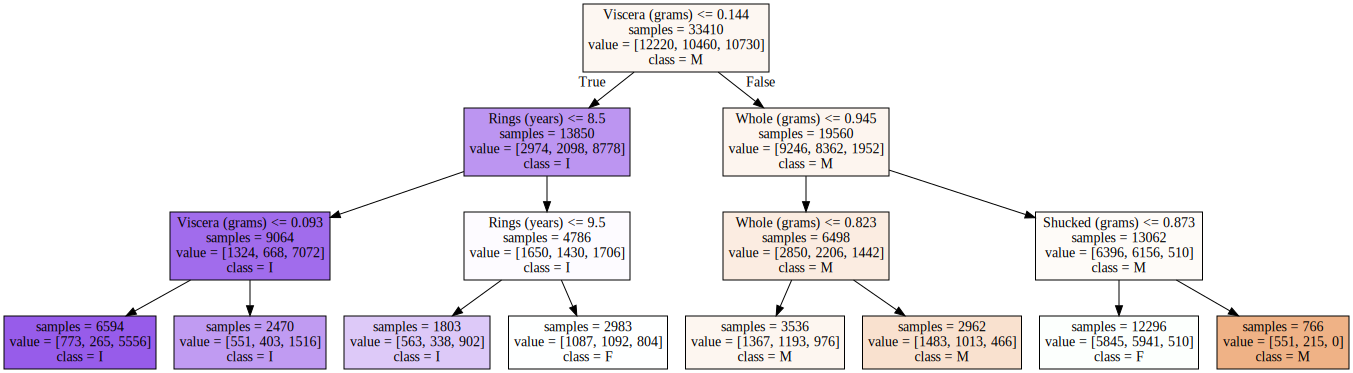

In [72]:
    clase = ['M','F','I']
    fture = ['Length (mm)', 'Diameter (mm)', 'Height (mm)', 'Whole (grams)', 'Shucked (grams)', 'Viscera (grams)', 'Shell (grams)', 'Rings (years)']
   
    export_graphviz(clasificador,out_file = ('arbol.dot'), class_names = clase, feature_names = fture, impurity = False, filled = True)
    with open('arbol.dot') as f:
        dot_graph = f.read()
    graphviz.Source(dot_graph)

obtenemos el arbol de decision donde observamos parametros por los cuales son clasificados los datos
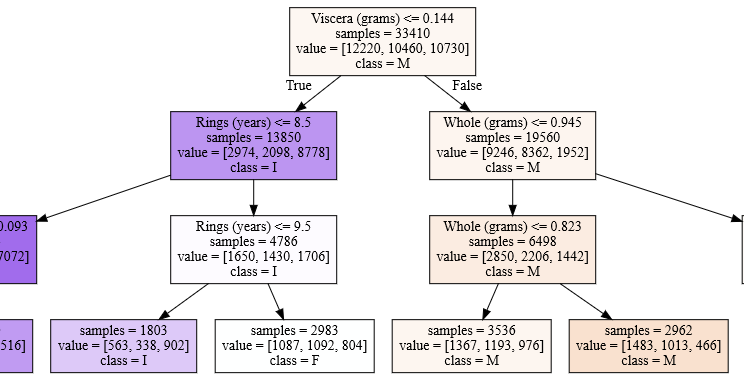